c:\Users\gmspr\anaconda3\envs\stats\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\gmspr\anaconda3\envs\stats\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\gmspr\anaconda3\envs\stats\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.675
              precision    recall  f1-score   support

       blues       0.88      0.75      0.81        20
   classical       0.87      1.00      0.93        13
     country       0.66      0.70      0.68        27
       disco       0.79      0.52      0.63        21
      hiphop       0.56      0.67      0.61        15
        jazz       0.70      0.73      0.71        22
       metal       0.76      0.88      0.81        25
         pop       0.67      0.92      0.77        13
      reggae       0.60      0.52      0.56        23
        rock       0.29      0.24      0.26        21

    accuracy                           0.68       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.67      0.68      0.67       200



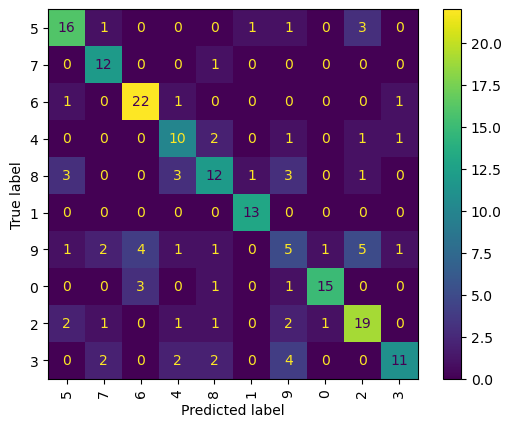

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


# Load your dataset
df = pd.read_csv(
    "data\data.csv"
)  # Make sure to replace "path/to/your/data.csv" with the actual path to your dataset

# If the labels are not yet encoded, you'll need to encode them
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])

# Define features and labels
X = df.drop(["label", "filename"], axis=1)
y = df["label"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize models
log_clf = LogisticRegression(max_iter=5000, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
mlp_clf = MLPClassifier(random_state=42)
knn_clf = KNeighborsClassifier()

# Create the voting classifier ensemble
voting_clf = VotingClassifier(
    estimators=[
        ("lr", log_clf),
        ("rf", rf_clf),
        ("svc", svm_clf),
        ("xgb", xgb_clf),
        ("mlp", mlp_clf),
        ("knn", knn_clf),
    ],
    voting="soft",
)

# Fit and predict as before
voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_test_scaled)

# Evaluate the expanded model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

classes = pd.unique(y_pred)
conf_matrix = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred, labels=classes), display_labels=classes
)
conf_matrix.plot(xticks_rotation=90)